# Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("turboaz.csv")[["Buraxilish ili", "Yurush", "Qiymet"]]
data.head() #showing few rows

,Buraxilish ili,Yurush,Qiymet
0,1999,366 000 km,12500 AZN
1,2014,102 000 km,31500 $
2,2002,469 700 km,11700 AZN
3,1998,556 680 km,9700 AZN
4,2000,300 000 km,12700 AZN


In [3]:
data['Qiymet'].unique()

array(['12500 AZN', '31500 $', '11700 AZN', '9700 AZN', '12700 AZN',
       '11200 AZN', '13800 AZN', '11400 AZN', '8500 AZN', '6800 AZN',
       '11300 AZN', '9300 AZN', '12800 AZN', '7300 AZN', '12400 AZN',
       '7350 AZN', '10500 AZN', '12300 AZN', '10900 AZN', '14000 AZN',
       '10700 AZN', '7500 AZN', '8300 AZN', '8600 AZN', '12650 AZN',
       '11800 AZN', '12000 AZN', '11900 AZN', '32700 $', '50999 $',
       '9500 AZN', '11000 AZN', '9000 AZN', '10400 AZN', '11600 AZN',
       '10850 AZN', '36500 $', '10800 AZN', '10750 AZN', '9900 AZN',
       '10000 AZN', '6900 AZN', '18500 AZN', '8700 AZN', '11500 AZN',
       '8200 AZN', '7800 AZN', '8900 AZN', '10300 AZN', '8400 AZN',
       '7900 AZN', '10600 AZN', '56500 $', '15400 AZN', '12900 AZN',
       '37000 $', '18400 $', '9100 AZN', '9800 AZN', '55000 $',
       '10200 AZN', '10950 AZN', '16800 AZN', '14300 AZN', '13000 AZN',
       '20800 $', '12200 AZN', '15000 AZN', '8000 AZN', '15300 AZN',
       '15800 $', '4500 AZN', '1

In [4]:
# defining convert(string to int) function for column 'Yurush'
def yurush_string_to_int(data):
    data['Yurush'] = data['Yurush'].str.replace(' km', '').str.replace(' ', '').astype(int) 

In [5]:
yurush_string_to_int(data) #calling the convert function
data.head() #displaying

,Buraxilish ili,Yurush,Qiymet
0,1999,366000,12500 AZN
1,2014,102000,31500 $
2,2002,469700,11700 AZN
3,1998,556680,9700 AZN
4,2000,300000,12700 AZN


In [6]:
def qiymet_dollar_to_azn(data):
    converted_qiymet = [float(price.replace('$', '').strip()) * 1.7 if '$' in price else float(price.replace(' AZN', '').strip()) for price in data['Qiymet']]
    data['Qiymet'] = converted_qiymet

In [7]:
qiymet_dollar_to_azn(data)
data.head() 

,Buraxilish ili,Yurush,Qiymet
0,1999,366000,12500.0
1,2014,102000,53550.0
2,2002,469700,11700.0
3,1998,556680,9700.0
4,2000,300000,12700.0


# Visualization

<Axes: xlabel='Yurush', ylabel='Qiymet'>

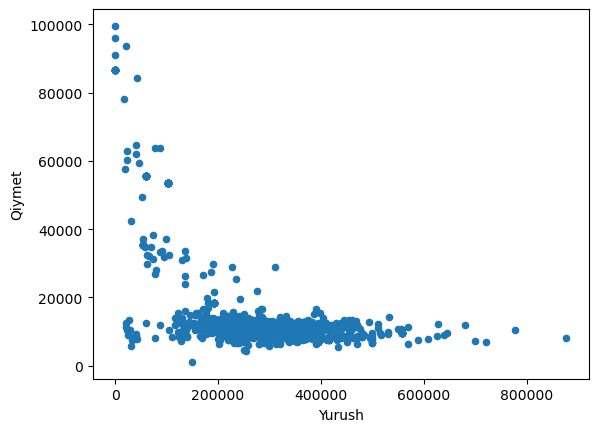

In [8]:
data.plot.scatter(x = "Yurush", y = "Qiymet")

# plt.figure(figsize=(8, 6))
# plt.scatter(data['Yurush'], data['Qiymet'], color='green', alpha=0.5)
# plt.title('Qiymet vs Yurush')
# plt.xlabel('Yurush')
# plt.ylabel('Qiymet (AZN)')
# plt.grid(True)
# plt.show()

<Axes: xlabel='Buraxilish ili', ylabel='Qiymet'>

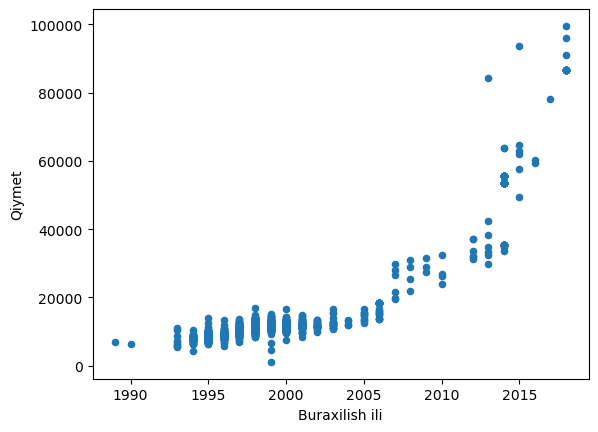

In [9]:
data.plot.scatter(x = "Buraxilish ili", y = "Qiymet")

# plt.figure(figsize=(8, 6))
# plt.scatter(data['Buraxilish ili'], data['Qiymet'], color='red', alpha=0.5)
# plt.title('Qiymet vs Buraxilish ili')
# plt.xlabel('Buraxilish ili')
# plt.ylabel('Qiymet (AZN)')
# plt.grid(True)
# plt.show()

Object `today` not found.


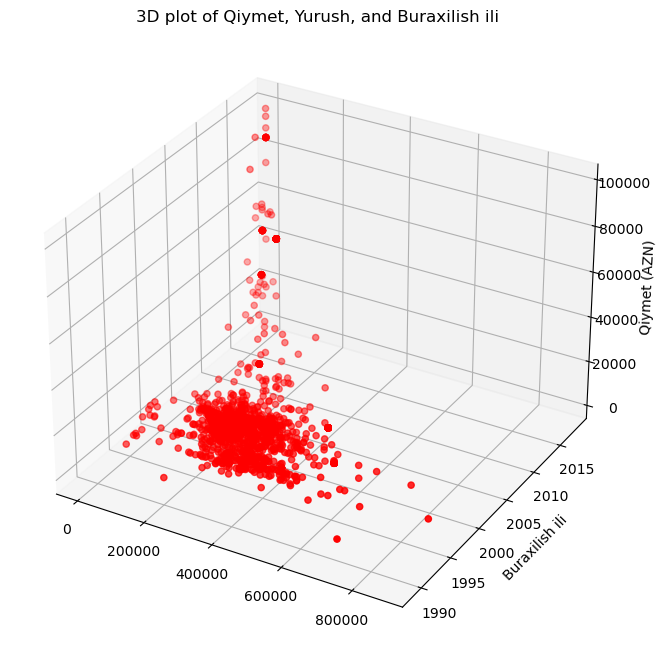

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Yurush'], data['Buraxilish ili'], data['Qiymet'], c='red', marker='o')
ax.set_title('3D plot of Qiymet, Yurush, and Buraxilish ili')
ax.set_xlabel('Yurush')Hello! How can I assist you today?
ax.set_ylabel('Buraxilish ili')
ax.set_zlabel('Qiymet (AZN)')
plt.show()

# Implementation of Linear Regression

### Calculate cost function

In [11]:
def multiply_matrix(mat, theta):
    return np.dot(mat, theta)

In [12]:
def calc_cost(X, y, theta):
    m = len(y)
    hyp_values = multiply_matrix(X, theta)
    squared_errors = (hyp_values - y) ** 2
    total_cost = np.sum(squared_errors) / (2 * m)
    return total_cost

In [13]:
x = data.drop(columns=['Qiymet']).values
y = data['Qiymet'].values

x = np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)

theta = np.zeros(x.shape[1])

cost = calc_cost(x, y, theta)
print("Initial cost:", cost)

Initial cost: 207350411.8323343


### Normalize data using Z score normalization

In [14]:
def normalize(x):
    mean = x.mean(0)
    sigma = x.std(0)
    
    sigma[sigma == 0] = 1e-10
    
    normalized_x = (x - mean) / sigma
    return normalized_x, mean, sigma

In [16]:
m, n = x.shape

xn, mean, sigma = normalize(x)

x_no = np.hstack((np.ones((m, 1)), xn))

theta = np.zeros(x_no.shape[1])


# Now you can calculate the cost function
cost = calc_cost(x_no, y, theta)
print("Cost:", cost)


Cost: 207350411.8323343
